In [2]:
# modeling_bio_nlp.ipynb

# 📘 NLP-Based Partner Recommendation using GitHub Bio

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Optional: For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the cleaned dataset
df = pd.read_csv("../data/cleaned_github_users.csv")

# Step 3: Basic Bio Preprocessing (optional: can expand later)
df['Bio'] = df['Bio'].fillna('No Bio Provided')

# Filter out users with 'No Bio Provided'
bio_df = df[df['Bio'] != 'No Bio Provided'].reset_index(drop=True)

# Step 4: TF-IDF Vectorization on Bios
tfidf = TfidfVectorizer(stop_words='english')
bio_tfidf_matrix = tfidf.fit_transform(bio_df['Bio'])

# Step 5: Compute Cosine Similarity
bio_similarity_matrix = cosine_similarity(bio_tfidf_matrix)

# Step 6: Recommendation Function using Bio Similarity
def recommend_from_bio(username, top_k=5, save_csv=True):
    if username not in bio_df['Username'].values:
        print("❌ Username not found or no bio available.")
        return pd.DataFrame()

    idx = bio_df.index[bio_df['Username'] == username][0]
    similarities = bio_similarity_matrix[idx]

    similar_indices = similarities.argsort()[::-1][1:top_k+10]  # Include buffer for filtering
    recommendations = bio_df.iloc[similar_indices].copy()
    recommendations['bio_score'] = similarities[similar_indices]

    result = recommendations[['Username', 'Bio', 'Location', 'Profile_URL', 'bio_score']].head(top_k)

    # Save to CSV
    if save_csv:
        result.to_csv("../data/bio_recommendations.csv", index=False)
        print("✅ Bio-based recommendations saved to: data/bio_recommendations.csv")

    return result

# Example usage
recommend_from_bio("abhay", top_k=5)



✅ Bio-based recommendations saved to: data/bio_recommendations.csv


,Username,Bio,Location,Profile_URL,bio_score
24,abhay,nostr: npub170uwqlxtwefytnpvek42qsazs0wq0ej856...,"San Francisco, CA",https://github.com/abhay,1.000000
994,nickolai,nostr: npub1d0ne05dgy7lnlazh7namumcj0fzg7ja6yk...,"Kutaisi, ex. St.-Petersburg, Russia",https://github.com/nickolai,0.432520
25,rabble,Founder & CEO of Planetary / Nos.social\r\n\r\...,"Pōneke, Aotearoa",https://github.com/rabble,0.133643
18,rabble,Founder & CEO of Planetary / Nos.social\r\n\r\...,"Pōneke, Aotearoa",https://github.com/rabble,0.133643
354,travis,building tools for a better future on the web ...,Oakland,https://github.com/travis,0.000000


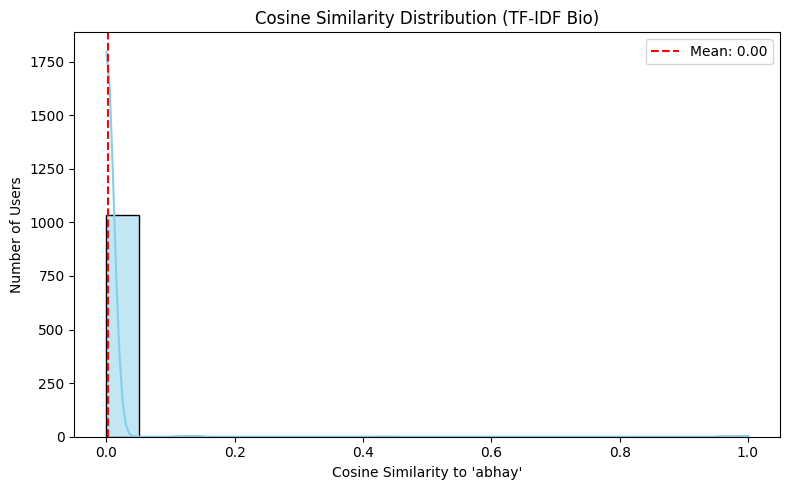

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get similarity scores for 'abhay'
idx = bio_df.index[bio_df['Username'] == "abhay"][0]
similarities = bio_similarity_matrix[idx]

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(similarities, bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Cosine Similarity Distribution (TF-IDF Bio)")
plt.xlabel("Cosine Similarity to 'abhay'")
plt.ylabel("Number of Users")
plt.axvline(np.mean(similarities), color='red', linestyle='--', label=f"Mean: {np.mean(similarities):.2f}")
plt.legend()
plt.tight_layout()
plt.show()


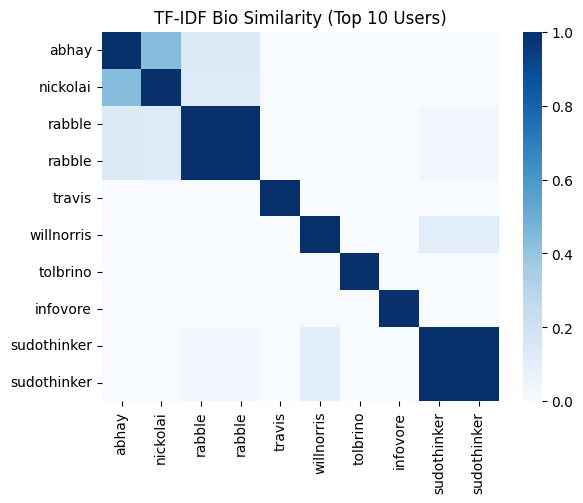

In [4]:
import seaborn as sns

# Top 10 most similar users (excluding abhay)
top_idxs = similarities.argsort()[::-1][1:11]
top_users = bio_df.iloc[top_idxs]['Username'].tolist()
sub_matrix = bio_similarity_matrix[top_idxs][:, top_idxs]

sns.heatmap(sub_matrix, xticklabels=top_users, yticklabels=top_users, cmap="Blues", annot=False)
plt.title("TF-IDF Bio Similarity (Top 10 Users)")
plt.show()
